In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lib para IA

In [175]:
import tensorflow as tf
import tensorflow_hub as hub

In [176]:
from sklearn.model_selection import train_test_split

# analise dos dados

In [177]:
df = pd.read_csv('diabetes.csv')

In [178]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

X - Dados
y - outcome

In [180]:
x = df[df.columns[:-1]]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [181]:
y = df[df.columns[-1]]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [182]:
df[df["Outcome"] == 1]
df[df["Outcome"] == 0]["BMI"]

1      26.6
3      28.1
5      25.6
7      35.3
10     37.6
       ... 
762    22.5
763    32.9
764    36.8
765    26.2
767    30.4
Name: BMI, Length: 500, dtype: float64

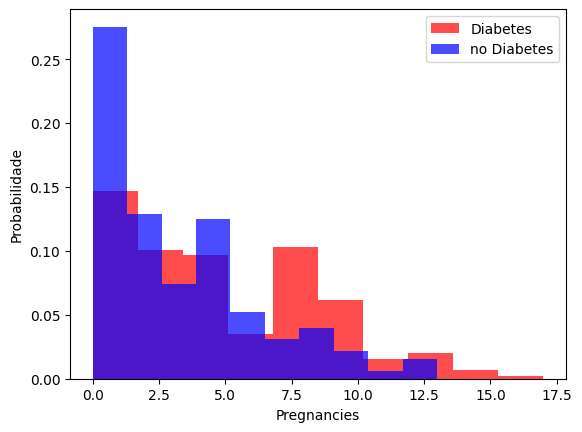

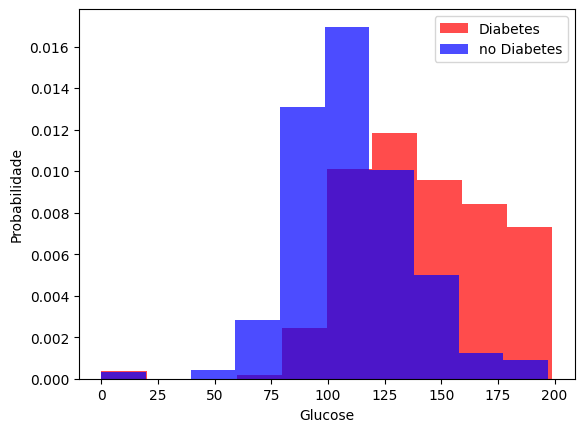

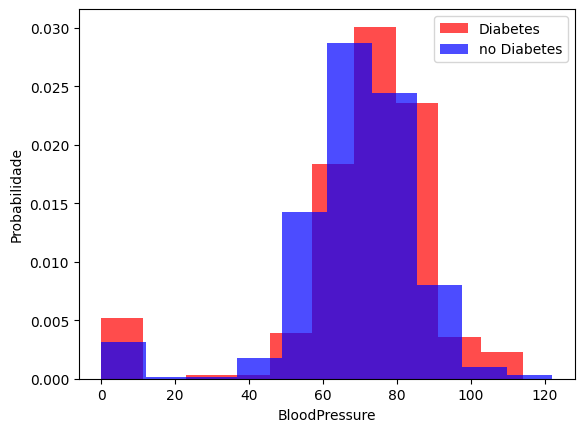

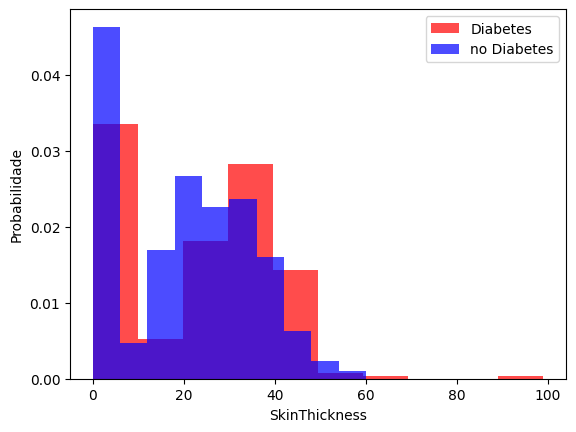

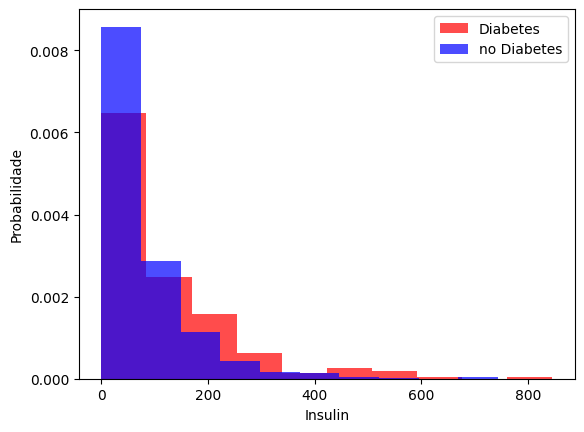

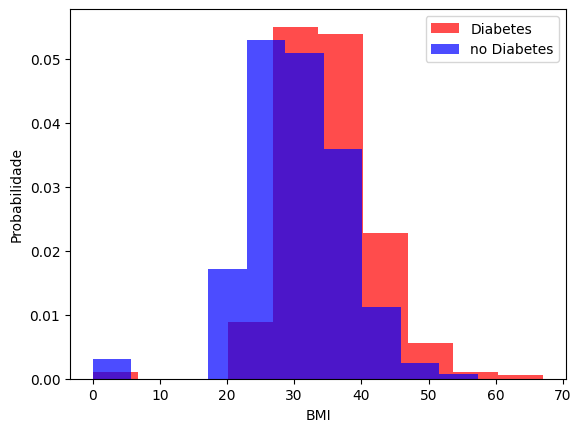

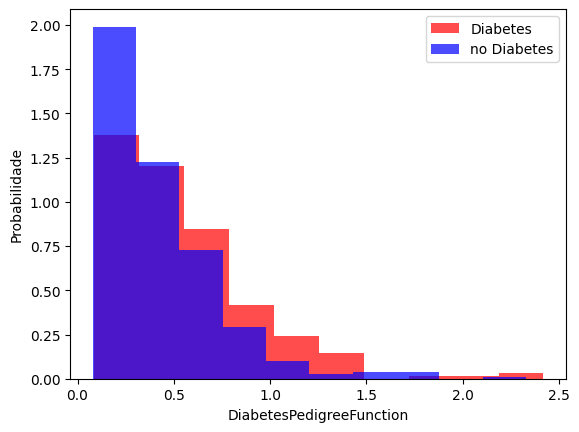

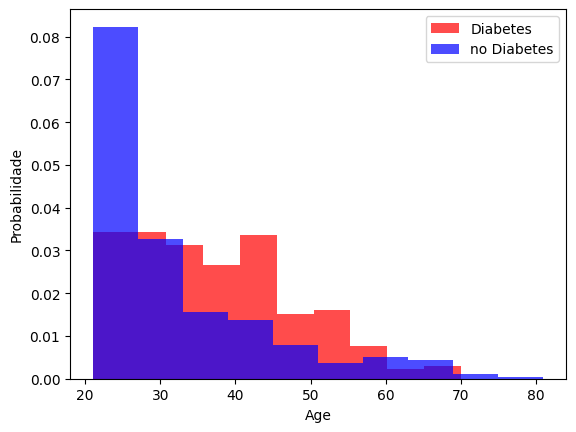

In [183]:
for i in range(len(df.columns[:-1])):
    lbl = df.columns[i]
    plt.hist(df[df["Outcome"] == 1][lbl], label="Diabetes", color="red", alpha=0.7, density=True)
    plt.hist(df[df["Outcome"] == 0][lbl], label="no Diabetes", color="blue", alpha=0.7, density=True)
    plt.xlabel(lbl)
    plt.ylabel("Probabilidade")
    plt.legend()
    plt.show()

In [184]:
x = df[df.columns[:-1]].values
type(x)

numpy.ndarray

In [185]:
y = df[df.columns[-1]].values
type(y)

numpy.ndarray

# Split dos dados

* set de treino(60%)      - treinar o modelo
* set de teste(20%)    - teste o modelo durante o treino
* set de validação(20%)  - testar o modelo



In [186]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [187]:
len(x_train), len(x_test), len(x_val)

x_train

array([[  3.   , 130.   ,  78.   , ...,  28.4  ,   0.323,  34.   ],
       [  1.   ,  80.   ,  74.   , ...,  30.   ,   0.527,  22.   ],
       [  4.   , 144.   ,  58.   , ...,  29.5  ,   0.287,  37.   ],
       ...,
       [  4.   ,  94.   ,  65.   , ...,  24.7  ,   0.148,  21.   ],
       [ 11.   ,  85.   ,  74.   , ...,  30.1  ,   0.3  ,  35.   ],
       [  5.   , 136.   ,  82.   , ...,   0.   ,   0.64 ,  69.   ]])

In [188]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) # 0 ou 1

])

In [189]:
modelo.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               loss= tf.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

In [190]:
modelo.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 6.7108 - accuracy: 0.3506


[6.710840225219727, 0.350649356842041]

In [191]:
modelo.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 6ms/step - loss: 2.3285 - accuracy: 0.5500 - val_loss: 0.9185 - val_accuracy: 0.4740
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.7579 - accuracy: 0.6000 - val_loss: 0.6481 - val_accuracy: 0.6558
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6348 - val_loss: 0.6465 - val_accuracy: 0.7208
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6196 - val_loss: 0.5940 - val_accuracy: 0.7143
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.6761 - val_loss: 0.6140 - val_accuracy: 0.6948
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6826 - val_loss: 0.5742 - val_accuracy: 0.6883
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6413 - val_loss: 0.6125 - val_accuracy: 0.7208
Epoch 8/20
29/29 [==

In [192]:
modelo.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7208


[0.6194115281105042, 0.7207792401313782]

5/5 [==============================] - 0s 3ms/step - loss: 2.8758 - accuracy: 0.3506 - 35%
5/5 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6948 - 39%

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [195]:
scaler = StandardScaler(with_mean=True, with_std=True)
x  = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [196]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [197]:
modelo = tf.keras.models.Sequential([

    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) # 0 ou 1

])

In [198]:
modelo.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               loss= tf.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

In [199]:
modelo.evaluate(x_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.5325


[0.7189827561378479, 0.5324675440788269]

In [200]:
modelo.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.5500 - val_loss: 0.6581 - val_accuracy: 0.7208
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6674 - val_loss: 0.6205 - val_accuracy: 0.7468
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.7000 - val_loss: 0.5912 - val_accuracy: 0.7532
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.7391 - val_loss: 0.5665 - val_accuracy: 0.7792
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7435 - val_loss: 0.5439 - val_accuracy: 0.7857
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7478 - val_loss: 0.5226 - val_accuracy: 0.7857
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7587 - val_loss: 0.5061 - val_accuracy: 0.7792
Epoch 8/20
29/29 [==

In [201]:
modelo.evaluate(x_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8182


[0.4477730393409729, 0.8181818127632141]

In [202]:
x_test[21]

array([-0.25095213,  1.16129525,  0.35643175,  0.96999799,  1.43441893,
       -0.04982572,  1.14499856, -0.44593516])